# 6.1 - Importação e visualização do banco de dados

### 1. Importar as bibliotecas que irão ser utilizadas:

In [2]:
# a. numpy as np;

import numpy as np

In [3]:
# b. pandas as pd;

import pandas as pd

In [4]:
# c. matplotlib.pyplot;

import matplotlib.pyplot as plt

In [5]:
# d. seaborn as sns;

import seaborn as sns
import warnings # To suppress some warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [6]:
# e. matplotlib inline, para gerar gráficos no próprio notebook;

%matplotlib inline

In [7]:
# f. Configurar o random seed para 0 (np.random.seed(0))

np.random.seed(0)

### 2. Transformar arquivos em dataframe e gerar momentos estatísticos:

In [8]:
# a. Importar os arquivos “kaggle/input/titanic/test.csv” e “kaggle/input/titanic/train.csv”;

unf_train_data = pd.read_csv(r"C:\Users\Cauan\Documents\UFV\NIAS-IA-treinamento-2024-2\Cauan\6 - Introdução ao Machine Learning\Titanic Dataset\train.csv")
unf_test_data = pd.read_csv(r"C:\Users\Cauan\Documents\UFV\NIAS-IA-treinamento-2024-2\Cauan\6 - Introdução ao Machine Learning\Titanic Dataset\test.csv")

In [9]:
# b. Gerar momentos estatísticos sobre o dataframe de treino, utilizando “.describe( )”;

display('Momento estátistico do dataset de treino:',unf_train_data.describe())
display('Momento estátistico do dataset de teste:',unf_test_data.describe())

'Momento estátistico do dataset de treino:'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Momento estátistico do dataset de teste:'

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 3. Análise dos dados:

In [10]:
# a. Identificar as Features do banco de dados que são categóricas (não numéricas), e as que são numéricas. As numéricas,
# deve-se separá-las em discretas e contínuas.

## i. Pode-se usar o método “.info( )” para descobrir o tipo de dado de cada Feature.

unf_train_data.info()

# > Note que teremos como categóricas as features: Sex, Name, Ticket, Cabin e Embarked
# > Para as númericas, teremos por discretas as features: PassengerId, Survived, Pclass, SibSp e Parch. Por contínuas teremos: Age e Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# b. Descobrir quais as Features contém NaN, além da quantidade desse tipo de dado em cada Feature.

## i. Pode-se utilizar o comando “DataFrame.isnull.sum( )”.

unf_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# c. Deve-se utilizar apenas Features numéricas e retirar as categóricas. Portanto, faça dois novos dataframes,
# apenas com as features numéricas do banco de dados de treino e de teste.

train_data = unf_train_data.groupby('PassengerId').agg({'Survived':'sum','Pclass':'sum','SibSp':'sum','Parch':'sum','Age':'sum','Fare':'sum'}).dropna()
test_data = unf_test_data.groupby('PassengerId').agg({'Pclass':'sum','SibSp':'sum','Parch':'sum','Age':'sum','Fare':'sum'}).fillna(value=0)

display(train_data)
display(test_data)

,Survived,Pclass,SibSp,Parch,Age,Fare
PassengerId,,,,,,
1,0,3,1,0,22.0,7.2500
2,1,1,1,0,38.0,71.2833
3,1,3,0,0,26.0,7.9250
4,1,1,1,0,35.0,53.1000
5,0,3,0,0,35.0,8.0500
...,...,...,...,...,...,...
887,0,2,0,0,27.0,13.0000
888,1,1,0,0,19.0,30.0000
889,0,3,1,2,0.0,23.4500


,Pclass,SibSp,Parch,Age,Fare
PassengerId,,,,,
892,3,0,0,34.5,7.8292
893,3,1,0,47.0,7.0000
894,2,0,0,62.0,9.6875
895,3,0,0,27.0,8.6625
896,3,1,1,22.0,12.2875
...,...,...,...,...,...
1305,3,0,0,0.0,8.0500
1306,1,0,0,39.0,108.9000
1307,3,0,0,38.5,7.2500


In [13]:
# As letras d. e e. já foram realizadas na formação dos novos datasets

#  6.2 - Exploração do banco de dados

### 1. Para a Feature “Age” será necessário criar uma nova Feature que a separe em 8 grupos para que se possa utilizar “sns.barplot”. (DICA: Crie um novo dataframe apenas com as informações necessárias para a criação deste gráfico)

In [14]:
# a. criar uma lista com os nomes que serão dados aos grupos em que as idades serão repartidas (Exemplo: “(0-10)”, “(10-20)”, ...) ;

age_groups = ['(0-10)','(10-20)','(20-30)','(30-40)','(40-50)','(50-60)','(60-70)','(70-80)']

In [15]:
# b. utilize pandas.cut, para separar as idades em 8 grupos e utilize o argumento “labels” para utilizar a lista dos nomes dos grupos;
# c. criar a nova coluna com os grupos, perceba que esta nova coluna será categórica;

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

train_data['Age Groups']=pd.cut(train_data.Age, age_bins, right=False, include_lowest=True, labels=age_groups)

C:\Users\Cauan\AppData\Local\Temp\ipykernel_7496\54186911.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_data = train_data.reset_index().groupby('Age Groups').Survived.sum().reset_index()


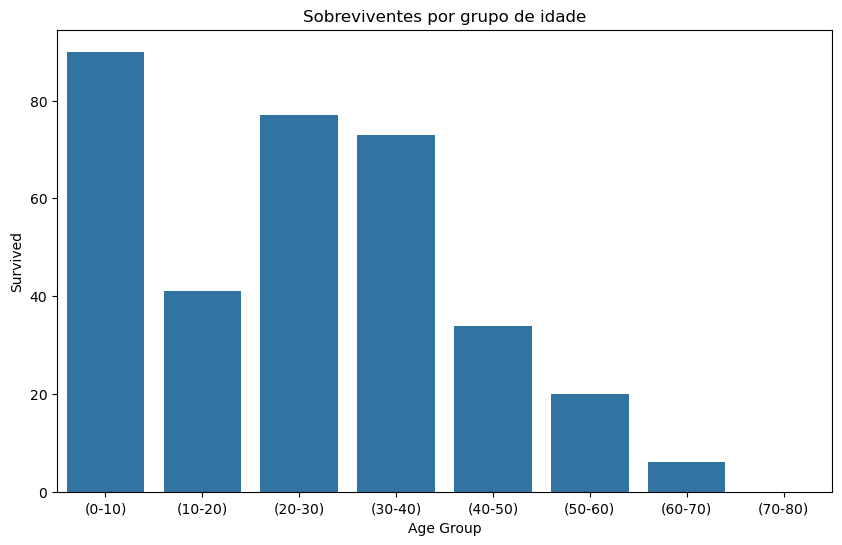

In [16]:
# d. criar um gráfico que indique a chance de sobrevivência por grupo de idade;

age_data = train_data.reset_index().groupby('Age Groups').Survived.sum().reset_index()

plt.figure(figsize=(10,6))
plt.title('Sobreviventes por grupo de idade')

sns.barplot(x=age_data['Age Groups'],y=age_data.Survived)

plt.xlabel('Age Group')

plt.show()

Note que a regra de crianças e mulheres primeiros, em especial as crianças, que são representadas pelo grupo (0-10), surtiu amplo efeito na margem de sobrevivência destas.

Note também a taxa de sobrevivência caindo conforme o aumento da idade, implicando muito provavelmente no efeito da saúde e do vigor na sobrevivência, como também a equipe, provavelmente formada por adultos na faixa etária de 40-60.

### 2. Crie gráficos para todas as outras features numéricas discretas, e faça uma análise dos resultados obtidos. Não será necessário produzir um gráfico para a feature “Fare”. Após a criação de cada gráfico será necessário realizar uma breve análise para avaliação do impacto de cada feature na predição.

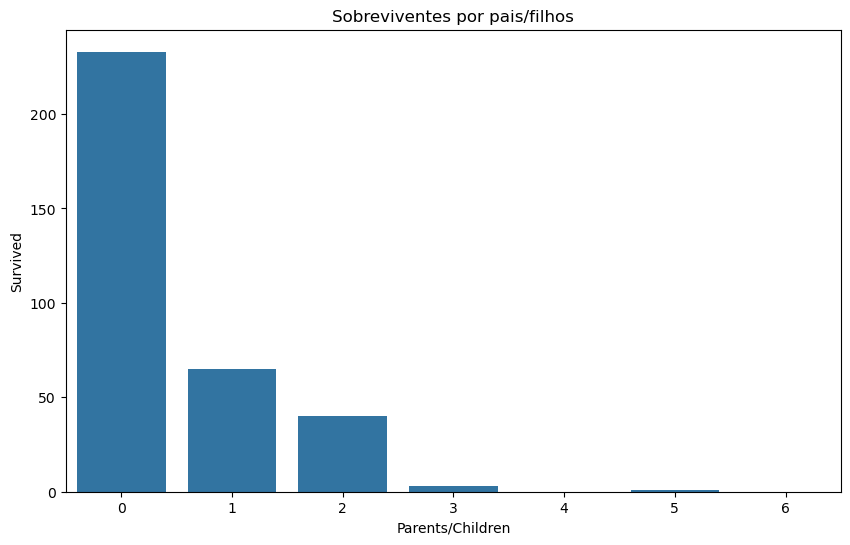

In [17]:
# Parch

Parch_data = train_data.groupby('Parch').Survived.sum().reset_index()

plt.figure(figsize=(10,6))
plt.title('Sobreviventes por pais/filhos')

sns.barplot(x=Parch_data.Parch,y=Parch_data.Survived)

plt.xlabel('Parents/Children')

plt.show()

# Note que, similar ao gráfico acima, um número menor de pais ou filhos acompanhando o sobrevivente, maior a chance de sobrevivência. Nesse caso, a diferença é ainda mais
# drástica e muito disso certamente pode ser atrelado ao príncipio de mulheres e crianças primeiro nos botes, mas também novamente a difusão da atenção, maior fragilidade
# das crianças, maior fragilidade de pais idosos, etc.

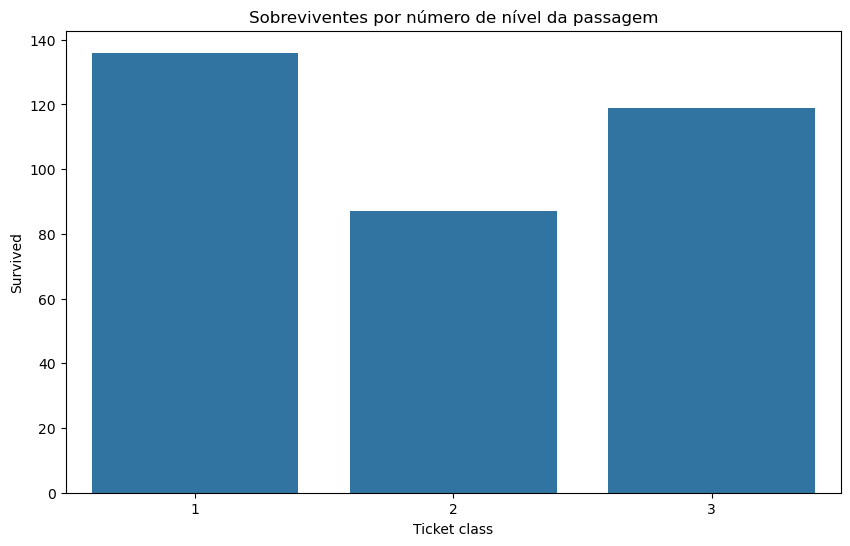

In [18]:
#Pclass

Pclass_data = train_data.groupby('Pclass').Survived.sum().reset_index()

plt.figure(figsize=(10,6))
plt.title('Sobreviventes por número de nível da passagem')

sns.barplot(x=Pclass_data.Pclass,y=Pclass_data.Survived)

plt.xlabel('Ticket class')

plt.show()

# Note um padrão parecido entre as colunas, entretanto note a quantidade de passageiros por clase de ticket influencia muito nesse número, já que a quantidade de passageiros
# considerados terceira classe era consideravelmente maior do que os das classes "acima". Observando esse fato e a similaridade no número de sobreviventes, é possível
# observar as vantagens garantidas pelo nível da passagem do sobrevivente.

# 6.3 - Treinamento do modelo e submissão das predições

### 1. Separação de banco de dados de treino e validação:

In [19]:
# a. Criar variável X, contendo o banco de dados apenas das Features;

train_features = ['SibSp','Pclass','Parch','Age', 'Fare']

X = train_data[train_features]

In [20]:
# b. Criar variável y, contendo o target da predição;

y = train_data.Survived

In [21]:
# c. Usar Train Test Split para separar treino e validação (DICA: utilizar validação com 20% do tamanho do treino);

from sklearn.model_selection import train_test_split

train_X,val_X, train_y,val_y = train_test_split(X,y,random_state=1,train_size=0.8)

### 2. Treinamento e validação do modelo:

In [22]:
### a. Importar Random Forest Classifier da biblioteca sklearn.ensemble;

from sklearn.ensemble import RandomForestClassifier

In [23]:
# b. Importar accuracy score da biblioteca sklearn.metrics;

from sklearn.metrics import accuracy_score

In [24]:
# c. Treinar random forest com as features e o target de treino;

titanic_model = RandomForestClassifier(random_state=1)


titanic_model.fit(train_X,train_y)

RandomForestClassifier(random_state=1)

In [25]:
# d. Realizar a predição;

titanic_model.predict(val_X)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [26]:
# e. Validar a predição, comparando com o target da validação, utilizando accuracy score;

accuracy_score(val_y,titanic_model.predict(val_X))

0.6536312849162011

Dada as limitações do modelo, a predição é satisfatória

### 3. Gerar predição, salvar a versão e submeter à competição:

In [27]:
# Gerar predição, salvar a versão e submeter à competição:

titanic_model.fit(X,y)

index = test_data.index

test_X = test_data[train_features]

titanic_model.predict(test_X)

titanic_submission = pd.DataFrame({'PassengerId':index,'Survived':titanic_model.predict(test_X)}).set_index('PassengerId')
titanic_submission

titanic_submission.to_csv()

'PassengerId,Survived\r\n892,0\r\n893,0\r\n894,1\r\n895,1\r\n896,1\r\n897,0\r\n898,0\r\n899,1\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,0\r\n907,0\r\n908,0\r\n909,1\r\n910,0\r\n911,0\r\n912,1\r\n913,0\r\n914,0\r\n915,1\r\n916,1\r\n917,0\r\n918,1\r\n919,1\r\n920,1\r\n921,0\r\n922,0\r\n923,0\r\n924,0\r\n925,0\r\n926,1\r\n927,1\r\n928,0\r\n929,0\r\n930,0\r\n931,1\r\n932,0\r\n933,1\r\n934,0\r\n935,0\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,0\r\n942,1\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,1\r\n951,1\r\n952,0\r\n953,1\r\n954,0\r\n955,1\r\n956,1\r\n957,0\r\n958,1\r\n959,0\r\n960,0\r\n961,0\r\n962,0\r\n963,0\r\n964,1\r\n965,1\r\n966,1\r\n967,1\r\n968,0\r\n969,1\r\n970,0\r\n971,0\r\n972,1\r\n973,0\r\n974,1\r\n975,0\r\n976,1\r\n977,0\r\n978,0\r\n979,1\r\n980,0\r\n981,1\r\n982,0\r\n983,1\r\n984,1\r\n985,0\r\n986,1\r\n987,0\r\n988,0\r\n989,1\r\n990,0\r\n991,0\r\n992,1\r\n993,1\r\n994,0\r\n995,0\r\n996,0\r\n997,0\r\n998,0\r\n999,0\r\n100

O código acima foi utilizado para gerar o arquivo de submissão em um notebook do Kaggle. O output resultante obteve precisão de 0.62200

# 7 - Data Cleaning

### 1. Análise inicial:

In [28]:
# a. Quais as colunas do banco de dados de teste e de treino?

print('Colunas do dataset de treino: ', unf_train_data.columns,'\n Colunas do dataset de teste: ', unf_test_data.columns,'\n')

Colunas do dataset de treino:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 Colunas do dataset de teste:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



In [29]:
# b. Qual o tipo de dado de cada coluna nos dataframes de teste e de treino?

print('Tipos das colunas do dataset de treino:\n', unf_train_data.dtypes,'\n Tipos das colunas do dataset de test:\n', unf_test_data.dtypes,'\n')

Tipos das colunas do dataset de treino:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 
 Tipos das colunas do dataset de test:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 



In [30]:
# c. Qual a quantidade de valores nulos (NaN) em cada feature?

print('Valores nulos em cada coluna do dataset de treino:\n',unf_train_data.isnull().sum(), '\n Valores nulos em cada coluno do dataset de test:\n',unf_test_data.isnull().sum(),'\n')

Valores nulos em cada coluna do dataset de treino:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
 Valores nulos em cada coluno do dataset de test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



In [31]:
# d. Realizar um cópia do banco de dados de teste e de treino para que se possa fazer a manipulação sem perder informações.

train_toclean = unf_train_data.copy()
test_toclean = unf_test_data.copy()

### 2. Para lidar com valores nulos, podemos preencher estes valores de alguma forma ou descartar a informação. Neste item utilizaremos algumas estratégias para tal.

In [32]:
# Letras a., b., c. e d.:

train_rlvnt = train_toclean.drop(['Cabin','Ticket'], axis=1).fillna({'Age':train_toclean['Age'].median(),'Fare':train_toclean['Fare'].median(),'Embarked':train_toclean['Embarked'].mode()[0]})
test_rlvnt = test_toclean.drop(['Cabin','Ticket'], axis=1).fillna({'Age':train_toclean['Age'].median(),'Fare':train_toclean['Fare'].median(),'Embarked':train_toclean['Embarked'].mode()[0]})

### 3. Para as Features contínuas será útil a criação de grupos para facilitar a análise. Dois métodos do pandas são úteis para esta tarefa, pd.cut e pd.qcut, também é útil visitar esta referência para uma melhor entendimento destes métodos.

In [33]:
# a. Criar Feature que separe a Feature “Age” em 5 intervalos de mesma extensão;

age_groups = ['(0-16)','(16-32)','(32-4\8)','(48-64)','(64-80)']
age_bins = [0, 16, 32, 48, 64, np.inf]

train_rlvnt['Age Groups']=test_rlvnt['Age Groups']=pd.cut(train_rlvnt.Age, age_bins, right=False, include_lowest=True, labels=age_groups).astype(str)

<>:3: SyntaxWarning: invalid escape sequence '\8'
<>:3: SyntaxWarning: invalid escape sequence '\8'
C:\Users\Cauan\AppData\Local\Temp\ipykernel_7496\2569489508.py:3: SyntaxWarning: invalid escape sequence '\8'
  age_groups = ['(0-16)','(16-32)','(32-4\8)','(48-64)','(64-80)']


In [34]:
# b. Criar Feature que separe “Fare” em 6 intervalos que contenham o mesmo número de dados (Não precisam ter a mesma extensão).

fare_groups = ['(0-4)','(4-8)','(8-16)','(16-32)','(32-64)','(64-513)']
fare_bins = [0,4,8,16,32,64,np.inf]

train_rlvnt['Fare Groups']=test_rlvnt['Fare Groups']=pd.cut(train_rlvnt.Fare, fare_bins, right=False, include_lowest=True, labels=fare_groups).astype(str)

train_rlvnt = train_rlvnt.drop(['Fare','Name'], axis=1)
test_rlvnt = test_rlvnt.drop(['Fare','Name'], axis=1)

In [35]:
# Resultado

display('Novo dataframe de treino: ', train_rlvnt,'Novo dataframe de teste: ', test_rlvnt)

'Novo dataframe de treino: '

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age Groups,Fare Groups
0,1,0,3,male,22.0,1,0,S,(16-32),(4-8)
1,2,1,1,female,38.0,1,0,C,(32-4\8),(64-513)
2,3,1,3,female,26.0,0,0,S,(16-32),(4-8)
3,4,1,1,female,35.0,1,0,S,(32-4\8),(32-64)
4,5,0,3,male,35.0,0,0,S,(32-4\8),(8-16)
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S,(16-32),(8-16)
887,888,1,1,female,19.0,0,0,S,(16-32),(16-32)
888,889,0,3,female,28.0,1,2,S,(16-32),(16-32)
889,890,1,1,male,26.0,0,0,C,(16-32),(16-32)


'Novo dataframe de teste: '

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Age Groups,Fare Groups
0,892,3,male,34.5,0,0,Q,(16-32),(4-8)
1,893,3,female,47.0,1,0,S,(32-4\8),(64-513)
2,894,2,male,62.0,0,0,Q,(16-32),(4-8)
3,895,3,male,27.0,0,0,S,(32-4\8),(32-64)
4,896,3,female,22.0,1,1,S,(32-4\8),(8-16)
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,28.0,0,0,S,(16-32),(0-4)
414,1306,1,female,39.0,0,0,C,(32-4\8),(4-8)
415,1307,3,male,38.5,0,0,S,(16-32),(8-16)
416,1308,3,male,28.0,0,0,S,(32-4\8),(32-64)


# 8.1 - Encoding de Variáveis Categóricas

### 1. Será necessário realizar o encoding das variáveis categóricas, no momento, 3 estratégias que serão utilizadas são o one-hot, label encoding e ordinal encoding. Para fazer isso será necessário relembrar quais são as features categóricas, definir a estratégia que será utilizada, criar as features codificadas e retirar as categóricas:

In [36]:
# a. Utilizar o método “.info( )” para relembrar quais são as features categóricas;

train_rlvnt.info()
test_rlvnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    object 
 8   Age Groups   891 non-null    object 
 9   Fare Groups  891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age      

In [37]:
# b. Utilizar o método “.select_dtypes” para identificar o nome das colunas numéricas e categóricas, para numéricas identifique formatos “int64” e “float64”,
# para categóricas identifique “Object”;

train_cat_data = train_rlvnt.select_dtypes('object')
test_cat_data = test_rlvnt.select_dtypes('object')

train_num_data = train_rlvnt.select_dtypes(['int64','float64']).drop('PassengerId', axis=1)
test_num_data = test_rlvnt.select_dtypes(['int64','float64']).drop('PassengerId',axis=1)

train_cat_data

,Sex,Embarked,Age Groups,Fare Groups
0,male,S,(16-32),(4-8)
1,female,C,(32-4\8),(64-513)
2,female,S,(16-32),(4-8)
3,female,S,(32-4\8),(32-64)
4,male,S,(32-4\8),(8-16)
...,...,...,...,...
886,male,S,(16-32),(8-16)
887,female,S,(16-32),(16-32)
888,female,S,(16-32),(16-32)
889,male,C,(16-32),(16-32)


In [38]:
# c. Temos algumas features categóricas que contém uma ordem clara, ou seja, existe o primeiro valor, segundo valor, terceiro valor, assim por diante, já em outras,
# isso não acontece.

ordered_train = ['Age Groups','Fare Groups']
ordered_test = ['Age Groups','Fare Groups']

unordered_train_cols = ['Embarked','Sex']
unordered_test_cols = ['Embarked','Sex']

In [39]:
# d. Criar uma função que realize o one-hot encode e, como saída, retorna um novo dataframe com as colunas que resultam da codificação, devidamente nomeadas,
# ao invés das features categóricas:

from sklearn.preprocessing import OneHotEncoder
OHEnc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

## i. Os argumentos deverão ser: o dataframe que será manipulado e as colunas que serão codificadas;
def OHEncode (df, categorical, train=True):
    
    ##ii. Realizar uma cópia do banco de dados que foi dado como argumento;
    copy = df.copy()
    
    ## iii. Criar um loop que realize o encoding das colunas presentes no argumento da função, as features resultantes devem conter o nome do valor que representam
    ## (OBS: utilizar o método “.get_feature_names”);
    if train:
        for i in categorical:
            OH_cols_X = pd.DataFrame(OHEnc.fit_transform(copy[categorical]))
            OH_cols_X.index = copy.index
            
            ## iv. Ainda dentro do loop, retirar do dataframe copiado as features categóricas e mesclar as features criadas pelo one-hot encoder;
            OH_X = pd.concat([copy.drop(categorical,axis=1),OH_cols_X], axis=1)
        
    ## iii. Criar um loop que realize o encoding das colunas presentes no argumento da função, as features resultantes devem conter o nome do valor que representam
    ## (OBS: utilizar o método “.get_feature_names”);
    else:
        for i in categorical:
            OH_cols_X = pd.DataFrame(OHEnc.transform(copy[categorical]))
            OH_cols_X.index = copy.index
            
            ## iv. Ainda dentro do loop, retirar do dataframe copiado as features categóricas e mesclar as features criadas pelo one-hot encoder;
            OH_X = pd.concat([copy.drop(categorical, axis=1),OH_cols_X], axis=1)

    return OH_X

enc_train_data = OHEncode(train_rlvnt, unordered_train_cols)

enc_test_data = OHEncode(test_rlvnt, unordered_test_cols, False)

In [40]:
# e. Criar novas features para realizar o label encoding das features que contém um ordenamento claro, e depois retirar as features categóricas que foram codificadas.

from sklearn.preprocessing import LabelEncoder
LEnc = LabelEncoder()

enc_train_data['Age Groups'] = LEnc.fit_transform(enc_train_data['Age Groups'])
enc_test_data['Age Groups'] = LEnc.transform(enc_test_data['Age Groups'])

enc_train_data['Fare Groups'] = LEnc.fit_transform(enc_train_data['Fare Groups'])
enc_test_data['Fare Groups'] = LEnc.transform(enc_test_data['Fare Groups'])

display('Dataframe de treino encoded: ', enc_train_data,'Dataframe de teste encoded: ', enc_test_data)

'Dataframe de treino encoded: '

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Age Groups,Fare Groups,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,1,3,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,2,4,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,1,3,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.0,1,0,2,2,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.0,0,0,2,5,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,1,5,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.0,0,0,1,1,0.0,0.0,1.0,1.0,0.0
888,889,0,3,28.0,1,2,1,1,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.0,0,0,1,1,1.0,0.0,0.0,0.0,1.0


'Dataframe de teste encoded: '

,PassengerId,Pclass,Age,SibSp,Parch,Age Groups,Fare Groups,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.5,0,0,1,3,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,2,4,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,1,3,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,2,2,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,2,5,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,1,0,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.0,0,0,2,3,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.5,0,0,1,5,0.0,0.0,1.0,0.0,1.0
416,1308,3,28.0,0,0,2,2,0.0,0.0,1.0,0.0,1.0


### 2. Agora será realizado um novo treinamento e avaliação de modelo, os passos serão os mesmo realizados no item 6.1 g), mas agora com o banco de dados que é resultado do encoding das variáveis categóricas. Após essa avaliação, será possível notar a evolução da precisão do modelo produzido utilizando essas novas técnicas.

In [41]:
X = enc_train_data.drop('Survived', axis=1)
y = enc_train_data.Survived

train_X,val_X, train_y,val_y = train_test_split(X,y,random_state=1,train_size=0.8)

enc_titanic_model = RandomForestClassifier(random_state=1)

enc_titanic_model.fit(train_X,train_y)
enc_titanic_model.predict(val_X)

print(accuracy_score(val_y,enc_titanic_model.predict(val_X)))

0.7821229050279329


In [42]:
# Gerar predição, salvar a versão e submeter à competição:

enc_titanic_model.fit(X,y)

enc_index = enc_test_data.index

enc_test_X = enc_test_data[enc_train_data.drop('Survived', axis=1).columns]

enc_titanic_model.predict(enc_test_X)

enc_titanic_submission = pd.DataFrame({'PassengerId':index,'Survived':enc_titanic_model.predict(enc_test_X)}).set_index('PassengerId')
enc_titanic_submission

enc_titanic_submission.to_csv('enc_titanic.csv')

# 8.2 - Pipelines

### 1. Deverá ser criada uma função que produz e avalia pipelines que utilizam diversas estratégias de imputing de valores nulos e encoding de variáveis categóricas.

In [43]:
# a. Colocar de volta os valores nulos das colunas “Age” e “Embarked” do dataframe de treino, utilizando as colunas do banco de dados original. Lembrando que,
# ao iniciar este notebook, foi feita uma cópia deste banco de dados.

train_topip = train_rlvnt.copy()
test_topip = test_rlvnt.copy()

for i in ['Age','Embarked']:
    train_topip[i]=train_toclean[i]
    test_topip[i]=test_toclean[i]

In [44]:
# b. Criar uma função que produza e avalie pipelines que utilizam estratégias indicadas nos argumentos:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

OEnc = OrdinalEncoder()

## i. Argumentos:
def AvPip(df, encoder, num_stg, cat_stg = 'most_frequent', model = RandomForestClassifier(random_state=1)):
    
    X = df.drop(['Survived'], axis=1)
    y = df.Survived
    
    
    ## ii. Definir as features e o target que serão usados para treinar o modelo e separar o banco de dados utilizando o train-test split.
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,train_size=0.8)

    cat_cols = train_X.select_dtypes('object').columns
    num_cols = train_X.select_dtypes(['int64','float64']).columns

    cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy=cat_stg)),('encoder', encoder)])


    ## iii. Criar um preprocessor que: para as features numéricas, utilize o imputer indicado por “numerical_imputer”; para as categóricas,
    ## utilize o imputer fornecido em “categorical_imputer” e como encoder utilize o argumento “encoder”.
    preprocessor = ColumnTransformer(transformers=[('num', SimpleImputer(strategy=num_stg), num_cols),('cat', cat_transformer, cat_cols)])

    ## iv. Produzir pipeline utilizando o preprocessor previamente construído e o modelo do argumento “model”.
    pip = Pipeline(steps=[('Preprocessor', preprocessor), ('model', model)])


    ## v. Realizar o treinamento da pipeline, gerar predições e avaliar utilizando accuracy score.
    pip.fit(train_X, train_y)
    
    
    ## vi. A função deve retornar o resultado da avaliação em porcentagem.
    return round(accuracy_score(val_y,pip.predict(val_X)),6) * 100

### 3. Aqui serão feitas duas listas, uma com algumas estratégias de imputing de valores nulos e outra com os encoders que foram utilizados até agora. O label encoder deve ter substituído pelo ordinal encoder, ambos têm o mesmo resultado, contudo o ordinal é feito para decodificar features, e o label, para o target. Acesse estas referências para entender sobre a utilização do Simple Imputer e Ordinal encoder

In [45]:
# a. Definir as 4 seguintes estratégias para imputing:

imputers = ['mean', 'most_frequent', 'median', 'constant']

In [46]:
# b. Definir as 2 estratégias para encoding:

encoders = [OEnc, OHEnc]

### 4. A partir da função de criação de pipelines e das listas de encoders e imputers, criar um loop que produza todas as combinações possíveis dessas estratégias, e mostre o resultado da avaliação de precisão de cada pipeline produzida no loop. (OBS: terá que ser usado um “for” dentro de outro).

In [47]:
pip_results = []

for i in encoders:
    for j in imputers:
        pip_results.append('{}%, para encoder {} e estratégia {}'.format(AvPip(train_topip, i, j), i, j))

pip_results

['78.7709%, para encoder OrdinalEncoder() e estratégia mean',
 '78.7709%, para encoder OrdinalEncoder() e estratégia most_frequent',
 '78.2123%, para encoder OrdinalEncoder() e estratégia median',
 '75.9777%, para encoder OrdinalEncoder() e estratégia constant',
 "77.6536%, para encoder OneHotEncoder(handle_unknown='ignore', sparse_output=False) e estratégia mean",
 "77.6536%, para encoder OneHotEncoder(handle_unknown='ignore', sparse_output=False) e estratégia most_frequent",
 "79.3296%, para encoder OneHotEncoder(handle_unknown='ignore', sparse_output=False) e estratégia median",
 "79.3296%, para encoder OneHotEncoder(handle_unknown='ignore', sparse_output=False) e estratégia constant"]

### 5. Avalie se alguma dessas estratégias usadas separadamente, gerou uma precisão do modelo maior que suas utilizações mescladas, que foi a estratégia realizada para produzir o modelo antes das pipelines.

Note que, das estratégias implementadas, as 2 primeiras e as 2 últimas foram as que obtiveram resultado maior do que o do item 8.1

# 8.3 - Cross Validation e Gradient Boosting

### 1. O cross validation é uma maneira melhor para avaliar os modelos com os quais estamos lidando. Portanto, o modelo que melhor se saiu nos teste até agora, deverá ser avaliado utilizando este método. Como resultado será utilizada a média entre as avaliações, lembre-se de utilizar o scoring = “accuracy”.

In [48]:
from sklearn.model_selection import cross_val_score

#dos modelos com as melhores avaliações, escolheremos a combinação de OneHot com a estratégia 'median'

train_tocrssval = train_topip.copy()

X = train_tocrssval.drop(['Survived'], axis=1)
y = train_tocrssval.Survived

cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes(['int64','float64']).columns

cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encoder', OHEnc)])

preprocessor = ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'), num_cols),('cat', cat_transformer, cat_cols)])

pip = Pipeline(steps=[('Preprocessor', preprocessor), ('model', RandomForestClassifier(random_state=1))])

crssval_results = list(cross_val_score(pip, X, y, cv=5, scoring='accuracy'))

crssval_results

for i in range(len(crssval_results)):
    crssval_results[i] = round(crssval_results[i], 6) * 100

crssval_results

[74.8603, 82.0225, 85.9551, 84.8315, 84.8315]

### 2. Assim como o Random Forest, o XGBoost também tem seu equivalente como classifier. O Gradient Boosting Classifier será utilizado agora para gerar um novo modelo, a partir do dataframe que foi manipulado com as melhores estratégias até agora.

In [49]:
# a. Importar o Gradient Boosting Classifier, utilizando random state = 0 e n_iter_no_change = 100 (Entender o que são esses parâmetros a partir da documentação do algoritmo);

from sklearn.ensemble import GradientBoostingClassifier

gbc_pip = Pipeline(steps=[('Preprocessor', preprocessor), ('model', GradientBoostingClassifier(random_state = 0, n_iter_no_change = 100))])

In [50]:
# b. Determinar as features e o target que serão utilizados para gerar o modelo;
# c. Treinar e avaliar o modelo utilizando cross validation;

gbc_results = list(cross_val_score(gbc_pip, X, y, cv=5, scoring='accuracy'))

In [51]:
# d. A partir da nota gerada pela avaliação, determinar qual algoritmo se saiu melhor, Random Forest ou Gradient Boosting.

for i in range(len(crssval_results)):
    gbc_results[i] = round(gbc_results[i], 6) * 100

gbc_results

[61.4525, 82.5843, 80.33709999999999, 82.5843, 84.8315]

# 9.1 - Feature Selection

### 1. O primeiro passo é a avaliação da importância de cada feature que já está no banco de dados de teste, para isso será criada uma função que produza um gráfico indicado o Mutual Information Score de cada feature existente no banco de dados de treino, em relação ao target:

In [52]:
# a. Determinar quais são as features discretas; (apenas as features “Age” e “Fare” não são discretas);

from sklearn.feature_selection import mutual_info_classif

train_toeng = unf_train_data.drop(['Ticket','Cabin','Name'], axis = 1)

unf_cat_cols = train_toeng.select_dtypes('object').columns
unf_num_cols = train_toeng.select_dtypes(['int64','float64']).columns

train_toeng[unf_cat_cols] = SimpleImputer(strategy = 'most_frequent').fit_transform(train_toeng[unf_cat_cols])
train_toeng[unf_num_cols] = SimpleImputer(strategy = 'median').fit_transform(train_toeng[unf_num_cols])

X = train_toeng.drop('Survived', axis = 1)
y = train_toeng['Survived']

disc_features = X.dtypes == int

In [53]:
# b. Criar a função que produza o gráfico de MI scores:


## i. Argumentos:
def PlotMI(features, target, discrete_features):

    for col in features.select_dtypes('object').columns:
        features[col], _ = features[col].factorize()
    
    
    ## ii. Gerar MI scores e produzir uma série do pandas com estes valore ordenados de forma descendente;
    mi_scores = mutual_info_classif(features, target, discrete_features = discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=features.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
   
   
    ## iii. Criar um gráfico de barras que indique a pontuação de cada features;
    plt_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(plt_scores))
    ticks = list(plt_scores.index)
    plt.barh(width, plt_scores)
    plt.yticks(width, ticks)
    plt.title("Pontuação de Informação Mútua de Scores")

    
    ## iv. A função deve retornar a série que contém os MI scores.
    return mi_scores

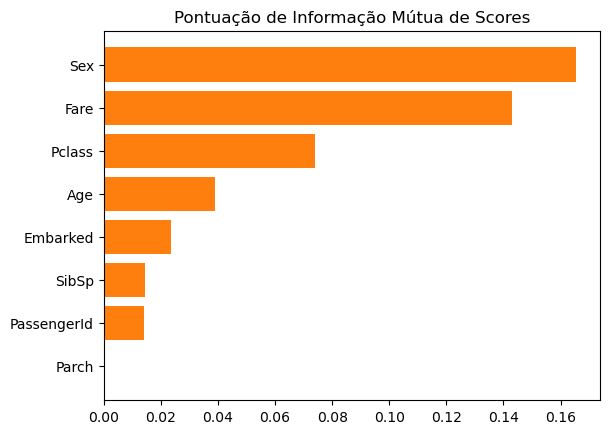

In [55]:
# c. Determinar quais são as features que serão utilizadas na função e o target;
# d. Produzir gráfico a partir da função e dos argumentos necessários.

PlotMI(X, y, disc_features)

plt.show()

### 2. Após a observação do gráfico gerado é possível concluir que as features que as features com maior influência no target são “Fare”, “Sex” e “Age”, por este motivo, elas serão analisadas mais a fundo por meio da utilização de gráficos. Para facilitar a visualização dos dados, é útil que seja usado um banco de dados que ainda contenha as features categóricas originais.

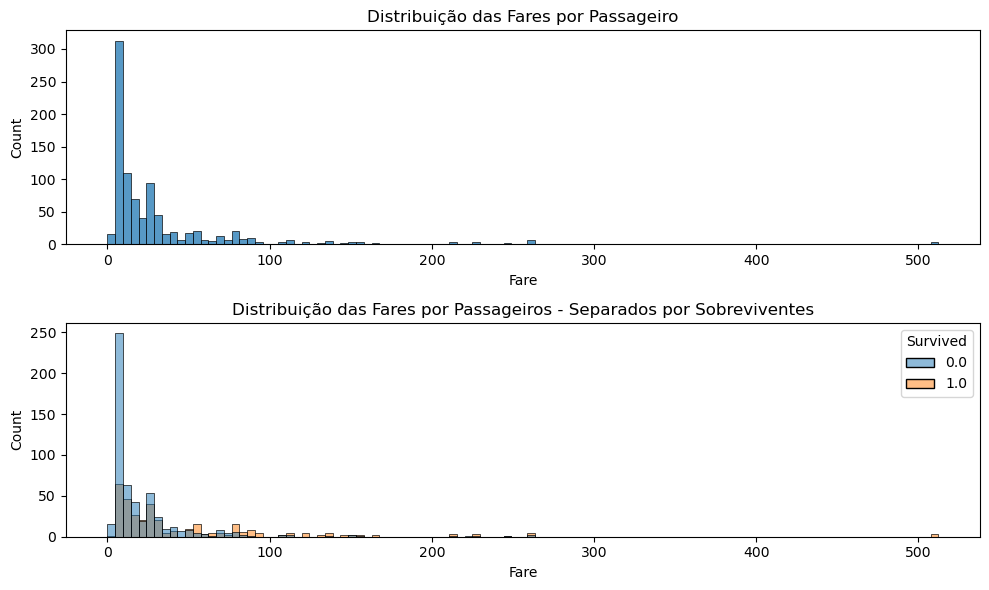

In [70]:
# a. Construir dois gráficos do tipo sns.histplot para a análise de “Fare”:

fig, ax = plt.subplots(2,1, figsize=(10,6))


## i. A distribuição total das taxas;
sns.histplot(data=train_toeng, x='Fare', ax = ax[0])
ax[0].title.set_text('Distribuição das Fares por Passageiro')


## ii. A distribuição relacionada com o target;
sns.histplot(data=train_toeng, x='Fare', hue='Survived', ax = ax[1])
ax[1].title.set_text('Distribuição das Fares por Passageiros - Separados por Sobreviventes')


fig.tight_layout()
plt.show()

#### iii. Realize uma análise em relação à distribuição total, se a curva é normal ou não, por exemplo. Qual a influência da feature “Fare” no target que pode ser percebida a partir do segundo gráfico?

A curva apresentada é considerada como não sendo normal. A partir do segundo gáfico, nota-se a a influência da taca na sobrevivência, de forma positiva. Quanto maior a taxa, maior a relação de sobreiventes.

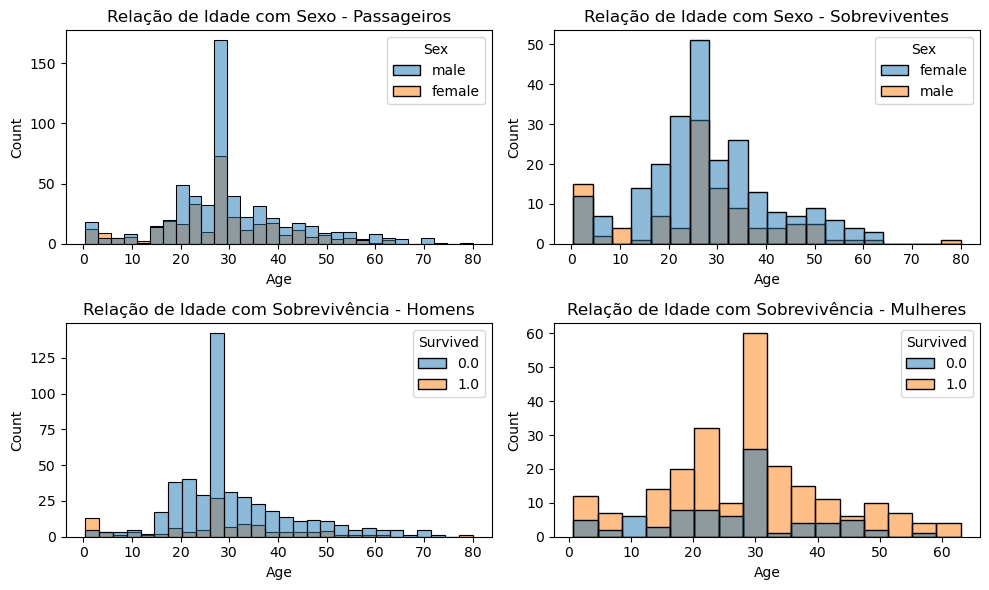

In [ ]:
# b. Agora serão criados 4 gráficos também utilizando histogramas com seaborn. Tais gráficos relacionam a Feature “Age” com “Sex”. Para facilitar a visualização
# é indicada a utilização de plt.subplots, para a visualização de mais de um gráfico por output:

fig, ax = plt.subplots(2,2, figsize=(10,6))


## i. Distribuição da idade dos passageiros utilizando o sexo como camada;
sns.histplot(data=train_toeng, x='Age', hue='Sex', ax=ax[0,0])
ax[0,0].title.set_text('Relação de Idade com Sexo - Passageiros')


## ii. A distribuição da idade dos passageiros, apenas entre os sobreviventes, utilizando o sexo como camada;
sns.histplot(data=train_toeng.loc[train_toeng['Survived'] == 1], x='Age', hue='Sex', ax = ax[0,1])
ax[0,1].title.set_text('Relação de Idade com Sexo - Sobreviventes')


## iii. Distribuição da idade dos homens, utilizando “Survived” como camada;
sns.histplot(data=train_toeng.loc[train_toeng['Sex'] == 'male'], x='Age', hue='Survived', ax = ax[1,0])
ax[1,0].title.set_text('Relação de Idade com Sobrevivência - Homens')


## iv. Distribuição da idade das mulheres, utilizando “Survived” como camada;
sns.histplot(data=train_toeng.loc[train_toeng['Sex'] == 'female'], x='Age', hue='Survived', ax = ax[1,1])
ax[1,1].title.set_text('Relação de Idade com Sobrevivência - Mulheres')


fig.tight_layout()
plt.show()

#### v. Faça uma análise comparando a distribuição dos sobreviventes, comparando homens e mulheres e qual e como a idade influencia na chance de sobrevivência.

Nota-se que a maioria dos passageiros possuía idades entre 20 e 30 anos e ram majoritariamente homens, especialmente nestafaixa. Ao analisarmos a taxa de sobrevivência, observamos uma tendência muito maior de sobrevivência das mulheres, especialmente nessa faixa etária.

# 9.2 - Feature Construction

### 1. Na feature “Name” existe, para cada passageiro, um título, como “Mr” ou “Miss”. Esta informação pode ser útil, então podemos criar uma nova coluna para obter estes dados.

In [71]:
# a. A partir de “Name” criar a feature “Title” para separar os valores, primeiramente, pela vírgula, e depois pelo ponto. Para isso deve-se utilizar o método str.split,
# lembre-se de criar uma nova coluna para armazenar estas informações, após isso, pode-se excluir a feature “Names”.

train_toeng['Title'] = unf_train_data['Name'].str.split(',', n=1, expand=True)[1].str.split('.', n=1, expand=True)[0]

### 2. Criar novas Features para resumir informações de outras já existentes, uma para indicar o número total de familiares de cada passageiro, sejam eles primos, filhos ou acompanhantes, e outra para informar se o passageiro está sozinho ou não.

In [72]:
# a. Criar feature que indique o tamanho da família, somando “SibSp” e “Parch”;

train_toeng['FamSiz'] = train_toeng['SibSp'] + train_toeng['Parch']

In [73]:
# b. Criar feature booleana indicando se o passageiro está sozinho, sendo, verdadeiro caso não tenha nenhum familiar a bordo, e falso caso tenha.

train_toeng['Accompanied'] = train_toeng['SibSp'].gt(0) | train_toeng['Parch'].gt(0)

In [74]:
# Resultado

train_toeng.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSiz,Accompanied
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Mr,1.0,True
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,Mrs,1.0,True
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Miss,0.0,False
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,Mrs,1.0,True
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Mr,0.0,False


# 9.3 - Feature Extraction

### 1. No banco de dados em que estamos trabalhando existem duas features com valores contínuos, são "Fare'' e “Age”, portanto, a partir da interação entre elas pode-se criar grupos utilizando K-means como forma de clustering.

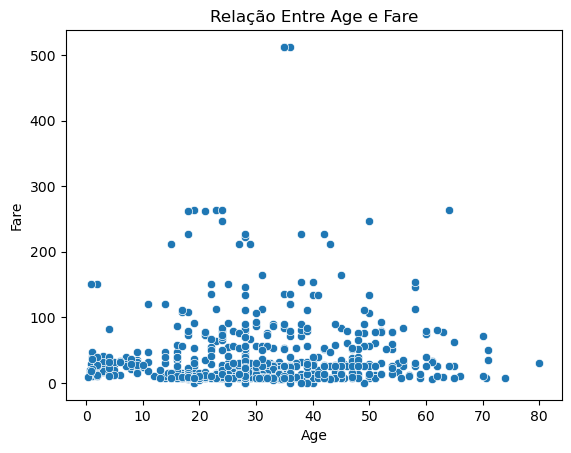

In [ ]:
# a. O primeiro passo é analisar a distribuição dos passageiros levando em consideração “Fare” e “Age”:

from sklearn.cluster import KMeans


## i. Produzir um gráfico, do tipo scatter plot, colocando “Age” e “Fare” como eixos.
sns.scatterplot(x=train_toeng['Age'],y=train_toeng['Fare'])
plt.title('Relação Entre Age e Fare')

plt.show()

## ii. Nesta distribuição é possível identificar outliers, esses valores devem ser retirados para que o algoritmo k-means, encontre os grupos da maneira correta.
## Como esses valores podem ser retirados?
## > Podemos remover os outliers usando o method pd.DataFrame.lt()

In [84]:
# b. Agora será necessário criar os grupos utilizando a biblioteca K-means do sklearn:


## i. Crie um dataframe que contenha apenas as features “Age” e “Fare”, para remover os outliers, selecione apenas os passageiros que tenham as taxas menores que 500;
AgeFare = train_toeng.loc[:, ['Age','Fare']].loc[train_toeng['Fare']<500]


## ii. Crie um algoritmo k-means que produza 6 grupos;
kmean = KMeans(n_clusters=6)


## iii. Utilizando este algoritmo, produza uma nova coluna no dataframe criado, contendo os grupos de cada passageiro;
AgeFare['Grupos'] = kmean.fit_predict(AgeFare)
AgeFare['Grupos'] = AgeFare['Grupos'].astype('category')

c:\Users\Cauan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\Cauan\AppData\Local\Temp\ipykernel_7496\2306684939.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_by_group = train_toeng.groupby('Grupos').agg({'Grupos':'count','Survived':'sum'})


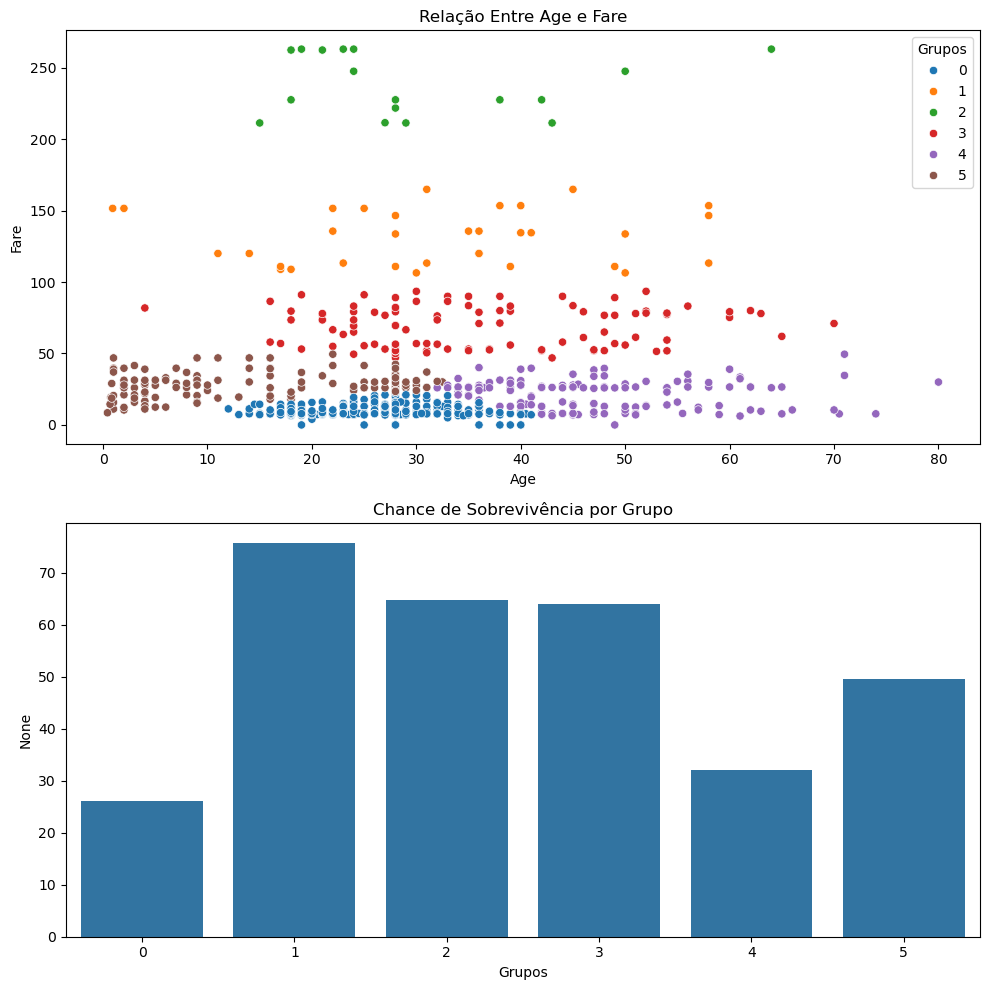

In [ ]:
# c. Agora será útil entender quais as características de cada grupo criado pelo algoritmo, para isso serão utilizados dois gráficos, um para identificar os grupos
# na distribuição “Age” x “Fare”, outro para avaliá-los em relação à chance de sobrevivência:

fig, ax = plt.subplots(2, 1, figsize = (10,10))


## i. Adicionar a nova feature ao banco de dados de treino;
train_toeng['Grupos'] = AgeFare['Grupos']


## ii. Construir um gráfico scatter plot que mostra a distribuição “Fare” x “Age”, tendo os grupos como camadas;
sns.scatterplot(x=train_toeng['Age'],y=train_toeng['Fare'], hue=train_toeng['Grupos'], ax = ax[0])
ax[0].title.set_text('Relação Entre Age e Fare')

survivors_by_group = train_toeng.groupby('Grupos').agg({'Grupos':'count','Survived':'sum'})
survival_chnc = (survivors_by_group['Survived']/survivors_by_group['Grupos'])*100
survival_chnc


## iii. Um gráfico bar chart que indique a chance de sobrevivência, em média, de cada grupo;
sns.barplot(x=survival_chnc.index, y=survival_chnc, ax = ax[1])
ax[1].title.set_text('Chance de Sobrevivência por Grupo')

fig.tight_layout()
plt.show()

#### iv. Faça uma análise qualitativa do que cada grupo representa e discuta sobre as chances de sobrevivência médias.

Conclui-se através da análise dos gráficos que os grupos podem ser denominados como:

0 - 'classe média', passageiros de todas as idades muito provavelmente de PClass 2;

1 - 'classe baixa idosa', passageiros de idade mais avançada e provavelmente de PClass 3;

2 - 'classe alta', passageiros de todas as idades e muito provavelmente de PClass 1;

3 - 'classe baixa acendente', transição entre classe baixa e média, de todas as idades;

4 - 'classe baixa jovem', passageiros adolescentes, jovens adultos e adultos, muito provavelmente de PClass 3;

5 - 'classe infanto-juvenil', passageiros em sua maioria crianças mas que se estende até os adultos

Nota-se o taxa de sobrevivência psotivamente influenciada pela taxa de pagamento, passageiros do grupo 0, 2 e 3 possuem as maiores taxas de sobrevivência, em conjunto com a taxa de sobrevivência negativamente influenciada pela idade, com os mais jovens com maior chance de sobreviver.

### 2. Ao analisarmos a nova feature, é fácil notar que existem valores nulos, estes valores correspondem aos outliers que foram retirados para a construção dos grupos. Para substituir os NaN, deve-se identificar quem são esses outliers e designar, manualmente, seu grupo:

In [93]:
# a. Identifique quem são os outliers;


## i. Utilize o método .loc do pandas para localizar as linhas onde ocorrem os valores nulos da nova feature;
display(train_toeng.loc[train_toeng['Grupos'].isnull()])


## ii. Analise as características destes passageiros e defina qual grupo melhor encaixam.
train_toeng['Grupos'].fillna(5, inplace=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSiz,Accompanied,Grupos
258,259.0,1.0,1.0,female,35.0,0.0,0.0,512.3292,C,Miss,0.0,False,NaN
679,680.0,1.0,1.0,male,36.0,0.0,1.0,512.3292,C,Mr,1.0,True,NaN
737,738.0,1.0,1.0,male,35.0,0.0,0.0,512.3292,C,Mr,0.0,False,NaN


C:\Users\Cauan\AppData\Local\Temp\ipykernel_7496\2655080059.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_toeng['Grupos'].fillna(5, inplace=True)


### 3. Agora avalie, utilizando mutual information, se a nova feature é significativa para a previsão do target (Utilize os passos mostrados em 9.1 - 1).

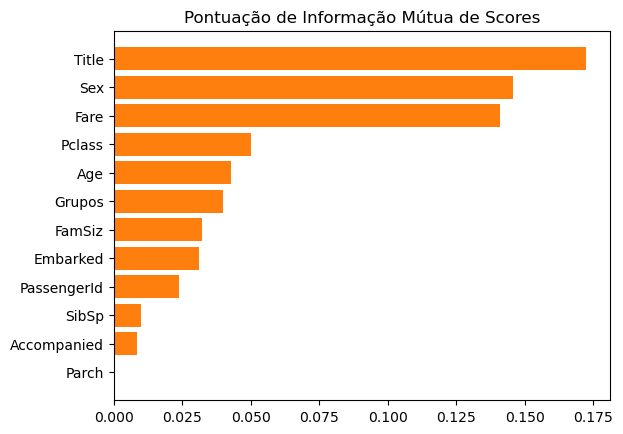

In [95]:
X = train_toeng.copy()
y = X.pop('Survived')

disc_features = X.dtypes == int

PlotMI(X, y, disc_features)

plt.show()

### 4. As features originais não representam a mesma grandeza, “Age” conta a idade emanos e “Fare” a taxa de embarque em dólares, portanto, para que seja possível utilizar o PCA, deve-se primeiramente realizar os Scaling das variáveis. Para esta etapa será utilizado o MinMax Scaler do scikit learn:

In [96]:
# a. Scaling das features “Age” e “Fare”, entre 0 e 1:

from sklearn.preprocessing import MinMaxScaler


## i. Criar um scaler utilizando minmax scaler;
scaler = MinMaxScaler()


## ii. Criar um dataframe para armazenar as features após o Scaling;
scl_features = pd.DataFrame()


## iii. Criar um loop que passe pelas duas features que serão escaladas:
for i in ['Age','Fare']:
    scl_features[i] = train_toeng[i]
    scl_features[i] = scaler.fit_transform(scl_features[[i]])

scl_features

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,0.346569,0.045771
889,0.321438,0.058556


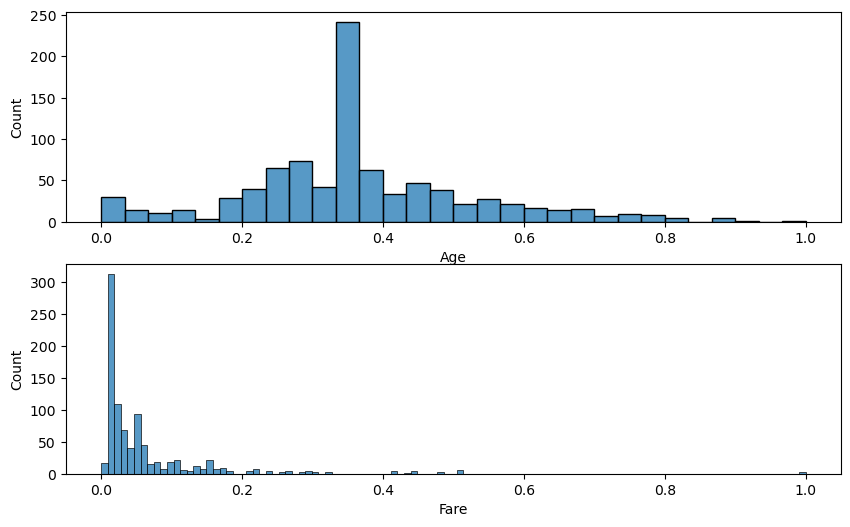

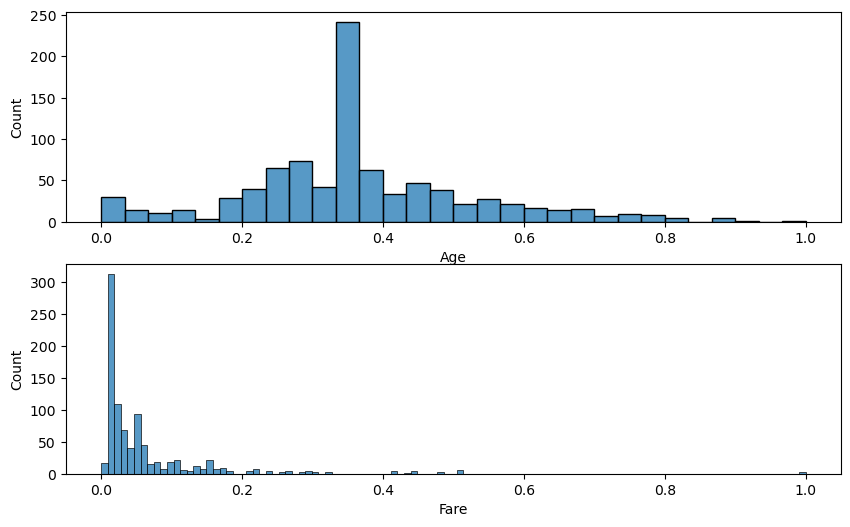

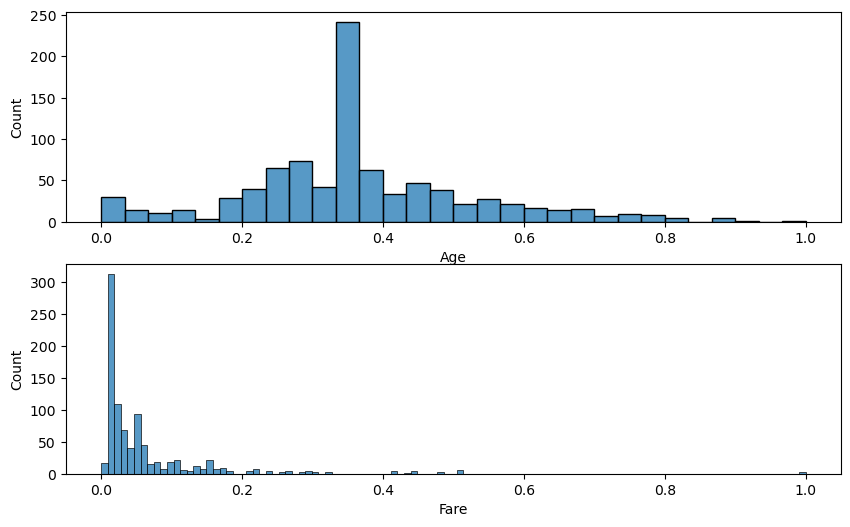

In [99]:
# b. Para garantir que o processo foi realizado com sucesso agora deve-se visualizar as duas colunas, elas devem ter seus valores entre 0 e 1 e manter sua forma original.

fig, ax = plt.subplots(2,1, figsize=(10,6))


## i. Fazer um histograma com a coluna “Age” do novo dataframe;
sns.histplot(data=scl_features, x='Age', ax = ax[0])


## ii. Fazer um histograma com a coluna “Fare” do novo dataframe.
sns.histplot(data=scl_features, x='Fare', ax = ax[1])

plt.show()

### 5. Agora já é possível realizar o PCA, contudo, não há garantias que esta estratégia trará novas informações úteis para o modelo, portanto, é necessário, após a criação dos novos eixos, analisar criticamente se vale a pena introduzi-los ao banco de dados.

In [101]:
# a. Realizar o PCA no dataframe com features escaladas:

from sklearn.decomposition import PCA


## i. Criar um PCA utilizando a biblioteca do sklearn;
pca = PCA()


## ii. Ajustar e transformar o dataframe com features escaladas utilizando PCA;
pca_features = pca.fit_transform(scl_features)


## iii. Criar um dataframe com os novos dados após a transformação com PCA;
component_names = [f"PC{i+1}" for i in range(pca_features.shape[1])]
pca_features = pd.DataFrame(pca_features, columns=component_names)

pca_features.head()


## iv. Criar um dataframe com os valores que foram multiplicados os eixos das features “Age” e “Fare”;
loadings = pd.DataFrame( pca.components_.T, columns=component_names, index=scl_features.columns)

loadings

,PC1,PC2
Age,0.996175,-0.087375
Fare,0.087375,0.996175


### 6. Agora, o último passo será avaliar a nova feature criada pelo PCA, utilizando o mesmo processo encontrado no curso de Feature Engineering do kaggle, no capítulo Principal Component Analysis. É viável, com essas técnicas, a substituição das features “Fare” e “Age” por apenas uma?

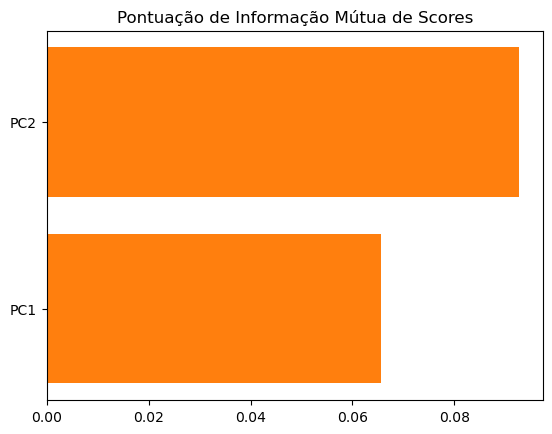

In [103]:
# Agora, o último passo será avaliar a nova feature criada pelo PCA, utilizando o mesmo processo encontrado no curso de Feature Engineering
# do kaggle, no capítulo Principal Component Analysis. É viável, com essas técnicas, a substituição das features “Fare” e “Age” por apenas uma?

PlotMI(pca_features,y,discrete_features=False)
plt.show()

#Note que ambas as features tiveram um score bastante baixo e portanto não devem ser consideradas